In [1]:
# import libraries and modules

import torch

from setup import *

from axis_angle import *

from axis_angle_analysis import *

In [2]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# TEAPOT

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


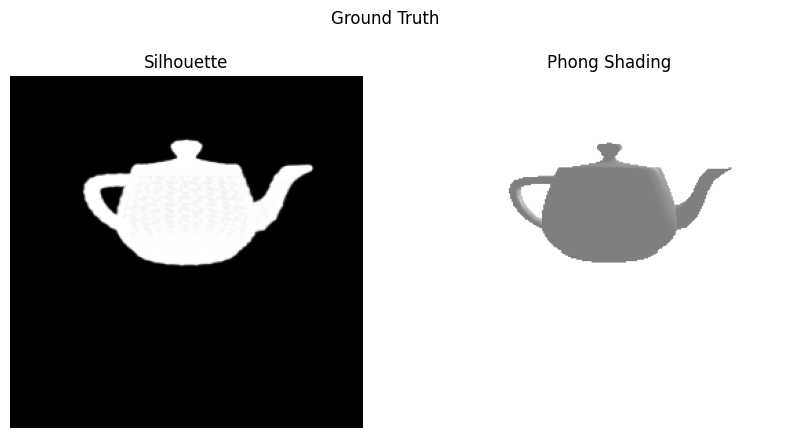

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

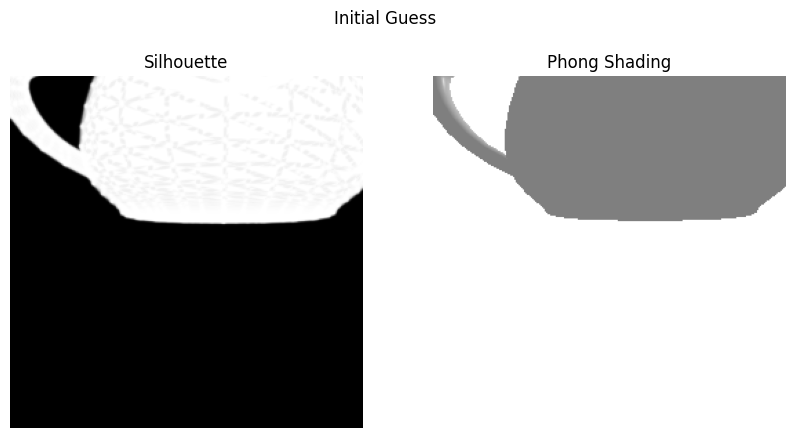

In [5]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)
plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

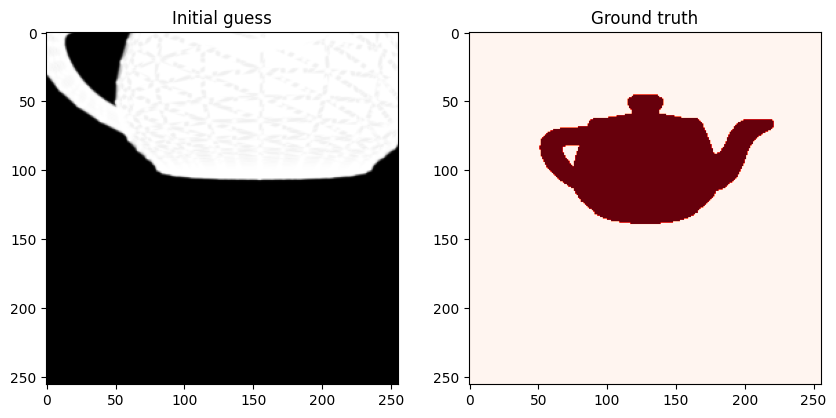

  0%|          | 0/15 [00:08<?, ?it/s]

iteration: 0, loss: 19099.8515625


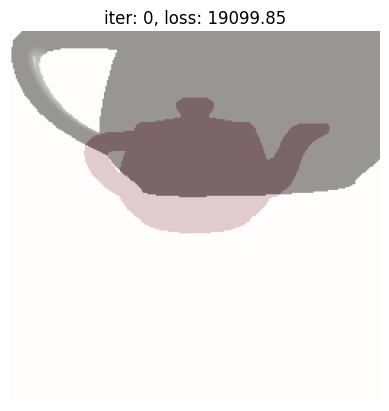

 13%|█▎        | 2/15 [00:18<01:58,  9.11s/it]

iteration: 1, loss: 18800.423828125


 20%|██        | 3/15 [00:28<01:56,  9.72s/it]

iteration: 2, loss: 17922.603515625


 27%|██▋       | 4/15 [00:39<01:52, 10.21s/it]

iteration: 3, loss: 16599.904296875


 33%|███▎      | 5/15 [00:51<01:47, 10.74s/it]

iteration: 4, loss: 15284.75


 40%|████      | 6/15 [01:03<01:41, 11.29s/it]

iteration: 5, loss: 14587.9521484375


 47%|████▋     | 7/15 [01:15<01:32, 11.56s/it]

iteration: 6, loss: 12776.419921875


 53%|█████▎    | 8/15 [01:27<01:20, 11.54s/it]

iteration: 7, loss: 11233.7626953125


 60%|██████    | 9/15 [01:38<01:08, 11.46s/it]

iteration: 8, loss: 10791.2998046875


 67%|██████▋   | 10/15 [01:49<00:56, 11.31s/it]

iteration: 9, loss: 10359.373046875


 67%|██████▋   | 10/15 [02:00<00:56, 11.31s/it]

iteration: 10, loss: 9813.6943359375


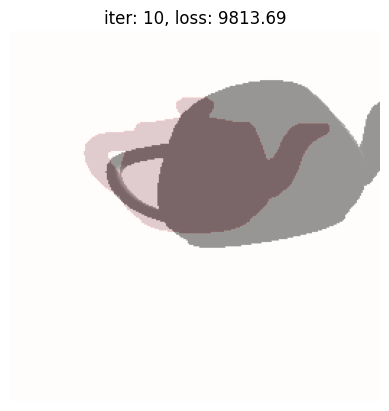

 80%|████████  | 12/15 [02:11<00:33, 11.15s/it]

iteration: 11, loss: 9194.388671875


 87%|████████▋ | 13/15 [02:22<00:22, 11.14s/it]

iteration: 12, loss: 8524.7919921875


 93%|█████████▎| 14/15 [02:33<00:11, 11.03s/it]

iteration: 13, loss: 7706.45263671875


100%|██████████| 15/15 [02:44<00:00, 10.94s/it]

iteration: 14, loss: 6925.8037109375


In [6]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 15, device)

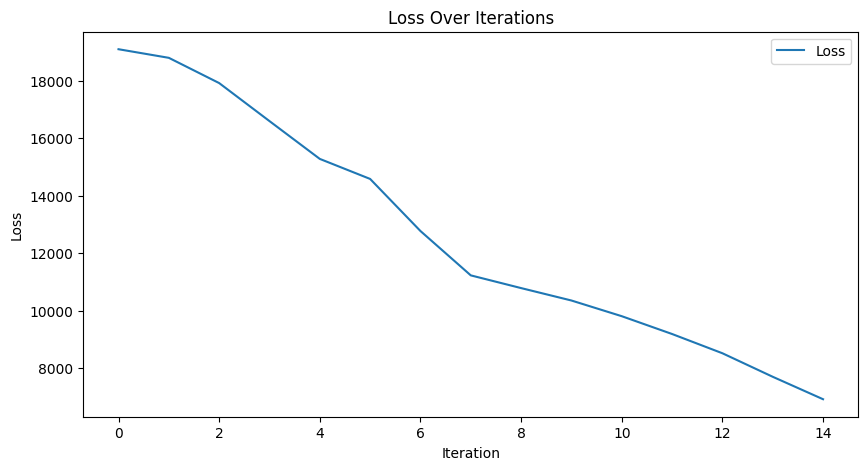

In [7]:
plot_losses(losses)

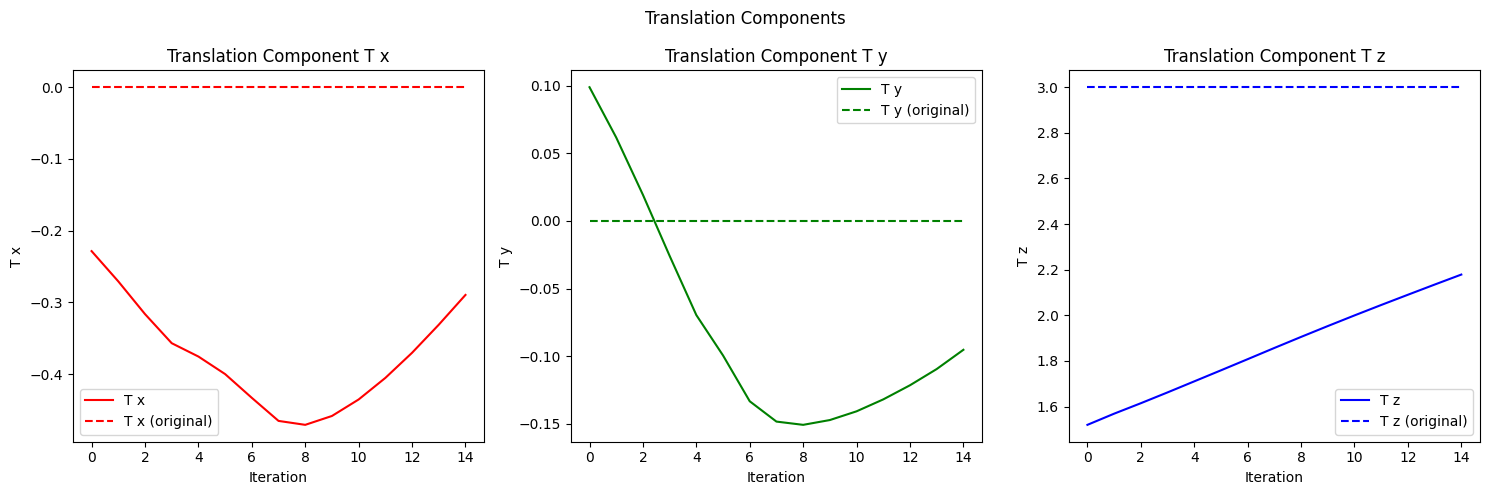

In [8]:
plot_translations(T_gt, parameter_updates)

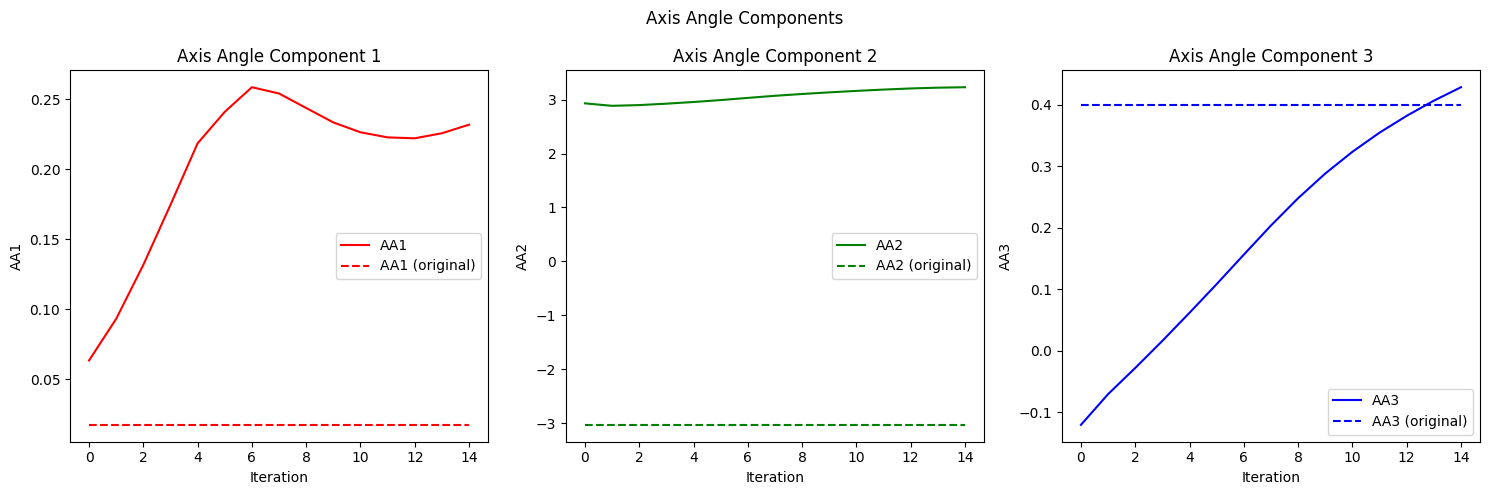

In [9]:
plot_axis_angles(R_gt, parameter_updates)